In [3276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3495]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [3278]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3279]:
traindf[(traindf["Name"] == "West, Miss. Constance Mirium") | (traindf["Name"] == "West, Mrs. Edwy Arthur (Ada Mary Worth)")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S


In [3280]:
testdf[testdf["Name"]=="West, Miss. Barbara J"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
250,1142,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.75,NaN,S


In [3281]:
# Extract surname
traindf['Surname'] = traindf['Name'].apply(lambda name: name.split(',')[0].strip())
# Group by surname and calculate survival rate
surname_survival = traindf.groupby('Surname')['Survived'].mean()
# Sort by survival rate
surname_survival = surname_survival.sort_values(ascending=False)

# Display the top 10 surname groups with highest survival rates
print(surname_survival.head(10))


Surname
Lehmann      1.0
Glynn        1.0
Hedman       1.0
Healy        1.0
Hays         1.0
Hawksford    1.0
Hassab       1.0
Ryerson      1.0
Saalfeld     1.0
Harder       1.0
Name: Survived, dtype: float64


In [3282]:
traindf["Surname"].unique()

array(['Braund', 'Cumings', 'Heikkinen', 'Futrelle', 'Allen', 'Moran',
       'McCarthy', 'Palsson', 'Johnson', 'Nasser', 'Sandstrom', 'Bonnell',
       'Saundercock', 'Andersson', 'Vestrom', 'Hewlett', 'Rice',
       'Williams', 'Vander Planke', 'Masselmani', 'Fynney', 'Beesley',
       'McGowan', 'Sloper', 'Asplund', 'Emir', 'Fortune', "O'Dwyer",
       'Todoroff', 'Uruchurtu', 'Spencer', 'Glynn', 'Wheadon', 'Meyer',
       'Holverson', 'Mamee', 'Cann', 'Nicola-Yarred', 'Ahlin', 'Turpin',
       'Kraeff', 'Laroche', 'Devaney', 'Rogers', 'Lennon', "O'Driscoll",
       'Samaan', 'Arnold-Franchi', 'Panula', 'Nosworthy', 'Harper',
       'Faunthorpe', 'Ostby', 'Woolner', 'Rugg', 'Novel', 'West',
       'Goodwin', 'Sirayanian', 'Icard', 'Harris', 'Skoog', 'Stewart',
       'Moubarek', 'Nye', 'Crease', 'Kink', 'Jenkin', 'Hood',
       'Chronopoulos', 'Bing', 'Moen', 'Staneff', 'Moutal', 'Caldwell',
       'Dowdell', 'Waelens', 'Sheerlinck', 'McDermott', 'Carrau', 'Ilett',
       'Backstrom

In [3283]:
submission.iloc[250]

PassengerId    1142
Survived          1
Name: 250, dtype: int64

In [3284]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Surname      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [3285]:
traindf["Cabin"].isna().sum()

687

In [3503]:
traindf.groupby('Cabin')['Survived'].mean().describe()

count    147.000000
mean       0.633787
std        0.454823
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [3504]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3286]:
traindf['has_cabin'] = traindf['Cabin'].notna().astype(int)


<Axes: xlabel='has_cabin', ylabel='count'>

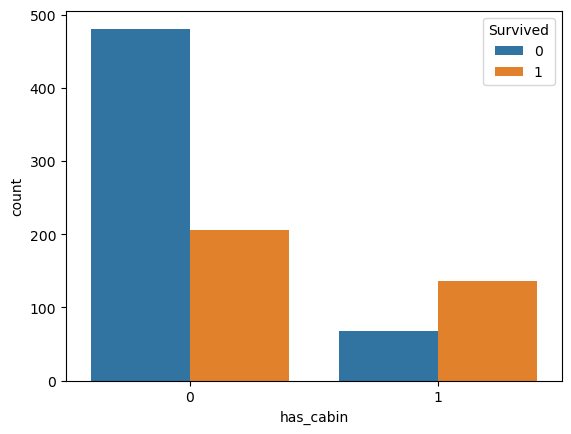

In [3287]:
sns.countplot(data=traindf,x="has_cabin",hue="Survived")

<Axes: xlabel='Pclass', ylabel='count'>

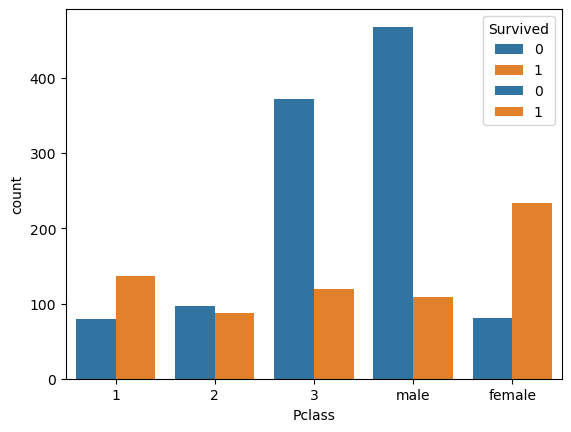

In [3288]:
sns.countplot(data=traindf,x="Pclass",hue="Survived")
sns.countplot(data=traindf,x="Sex",hue="Survived")



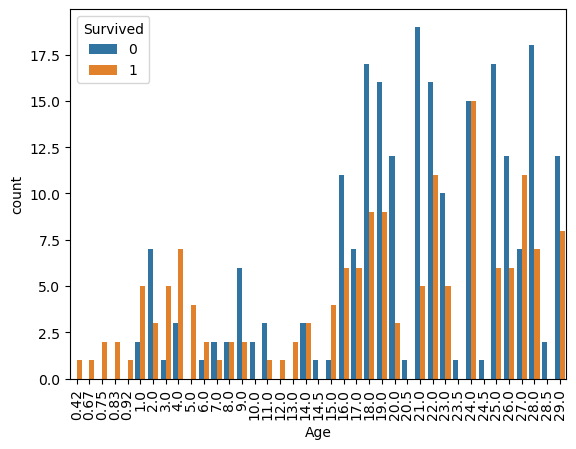

In [3289]:
sns.countplot(data=traindf[traindf["Age"]<30],x="Age",hue="Survived")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

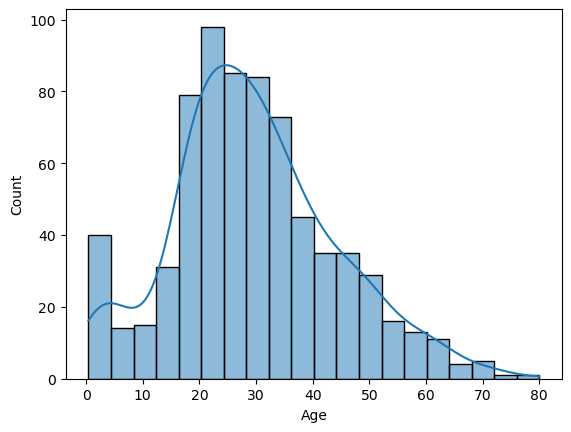

In [3290]:
sns.histplot(data=traindf,x="Age",kde=True)

In [3291]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Surname          0
has_cabin        0
dtype: int64

In [3294]:
traindf['Title'] = traindf['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
common_titles = ['Mr', 'Mrs', 'Master', 'Miss']
traindf[''] = traindf['Title'].apply(lambda title: title if title in common_titles else 'Other')

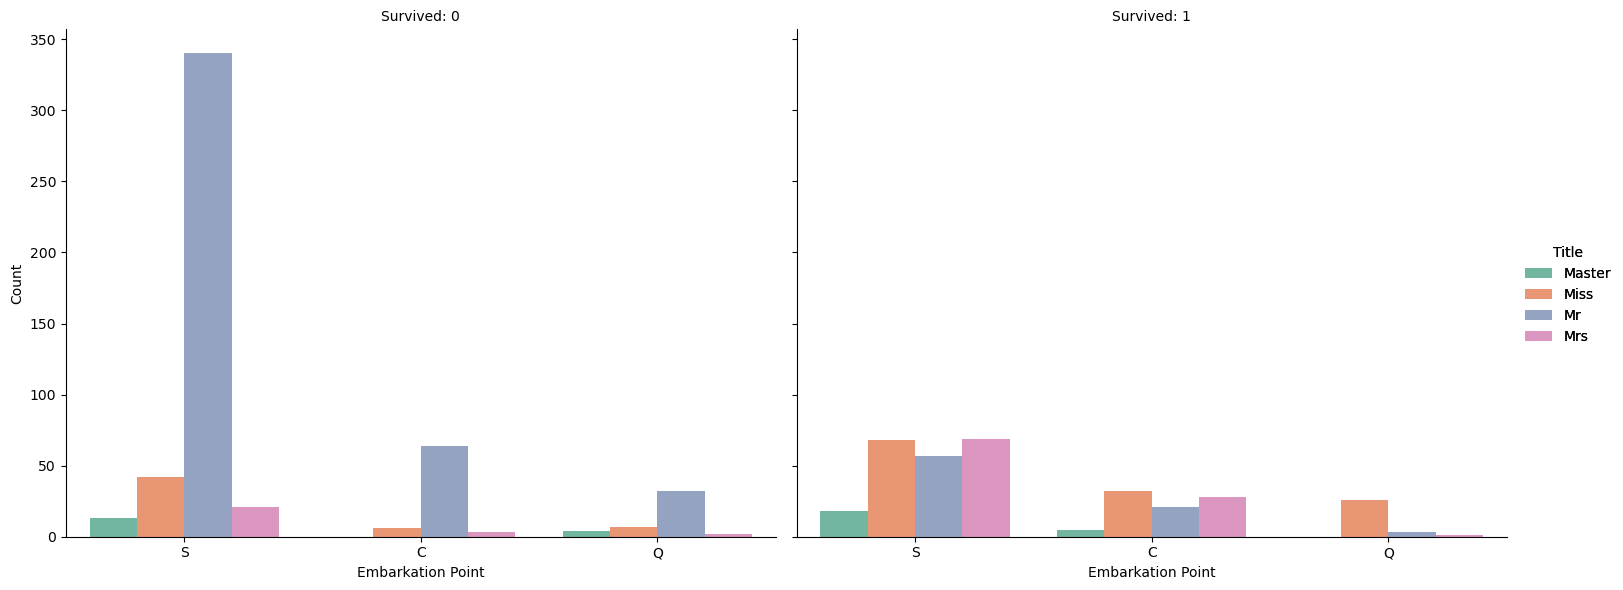

In [3295]:
g = sns.catplot(data=traindf, x="Embarked", hue="Title", col="Survived", kind="count", 
                hue_order=['Master', 'Miss', 'Mr', 'Mrs'], palette="Set2", height=6, aspect=1.2)
g.set_axis_labels("Embarkation Point", "Count")
g.add_legend(title="Title")
g.set_titles("Survived: {col_name}")
plt.show()



<Axes: xlabel='Title', ylabel='count'>

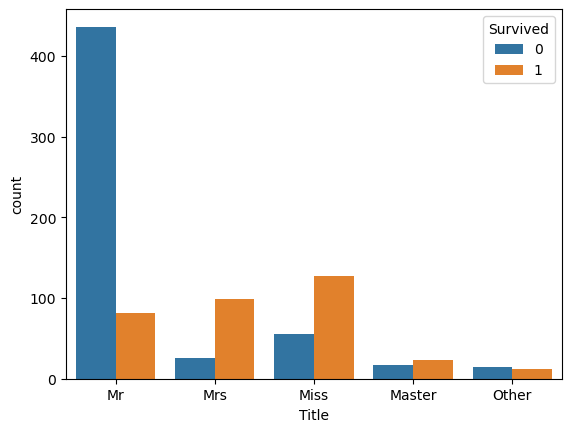

In [3296]:
sns.countplot(data=traindf,x="Title",hue="Survived")

In [3297]:
traindf.drop("Name",axis=1,inplace=True)

In [3298]:
traindf.groupby(['Title', 'Survived']).size().reset_index(name='Count')

,Title,Survived,Count
0,Master,0,17
1,Master,1,23
2,Miss,0,55
3,Miss,1,127
4,Mr,0,436
5,Mr,1,81
6,Mrs,0,26
7,Mrs,1,99
8,Other,0,15
9,Other,1,12


<Axes: xlabel='Title', ylabel='count'>

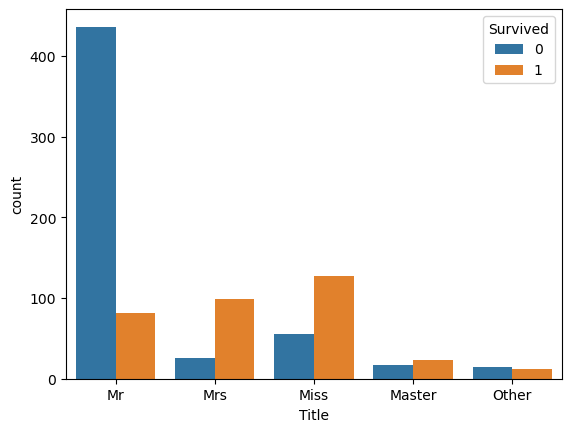

In [3299]:
sns.countplot(data=traindf,x="Title",hue="Survived")

In [3300]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(traindf['Title'], traindf['Survived'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check if the difference is statistically significant
print("p-value:", p)


p-value: 4.3050360647309247e-60


<Axes: xlabel='Title', ylabel='Count'>

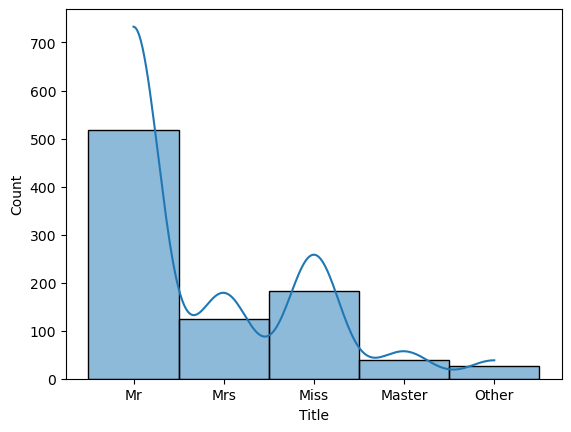

In [3301]:
sns.histplot(data=traindf,x="Title",kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

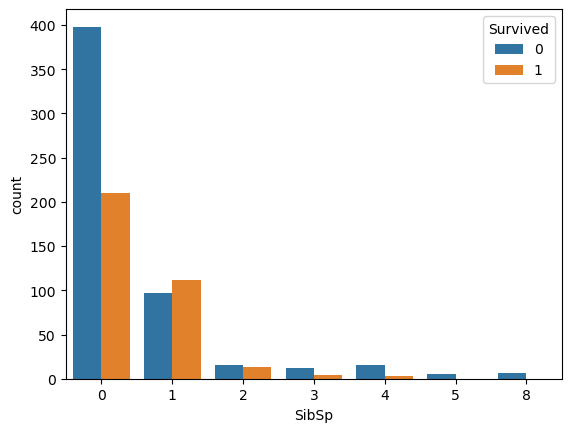

In [3302]:
sns.countplot(data=traindf,x="SibSp",hue="Survived")

In [3303]:
traindf.groupby(['SibSp', 'Survived']).size().reset_index(name='Count')

,SibSp,Survived,Count
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


In [3304]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(traindf['SibSp'], traindf['Survived'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check if the difference is statistically significant
print("p-value:", p)


p-value: 1.5585810465902147e-06


In [3305]:
from scipy.stats import pointbiserialr

# Calculate Point Biserial Correlation
corr, p_value = pointbiserialr(traindf['SibSp'], traindf['Survived'])
print("Correlation:", corr)
print("p-value:", p_value)


Correlation: -0.03532249888573565
p-value: 0.29224392869829097


In [3306]:
import statsmodels.api as sm

X = traindf[['SibSp']]  # Use SibSp as a predictor
y = traindf['Survived']  # Survived as the target

# Add a constant to the model (for intercept)
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Get the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.665272
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Nov 2024   Pseudo R-squ.:               0.0009611
Time:                        22:52:08   Log-Likelihood:                -592.76
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                    0.2856
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4382      0.076     -5.744      0.000      -0.588      -0.289
SibSp         -0.0686      0.

In [3307]:
##SibSp seems to have a relationship with the target but test shows that there is no direct correlation. Maybe combine with other features?

In [3308]:
traindf['Family_Size'] = traindf['Parch'] + traindf['SibSp'] + 1


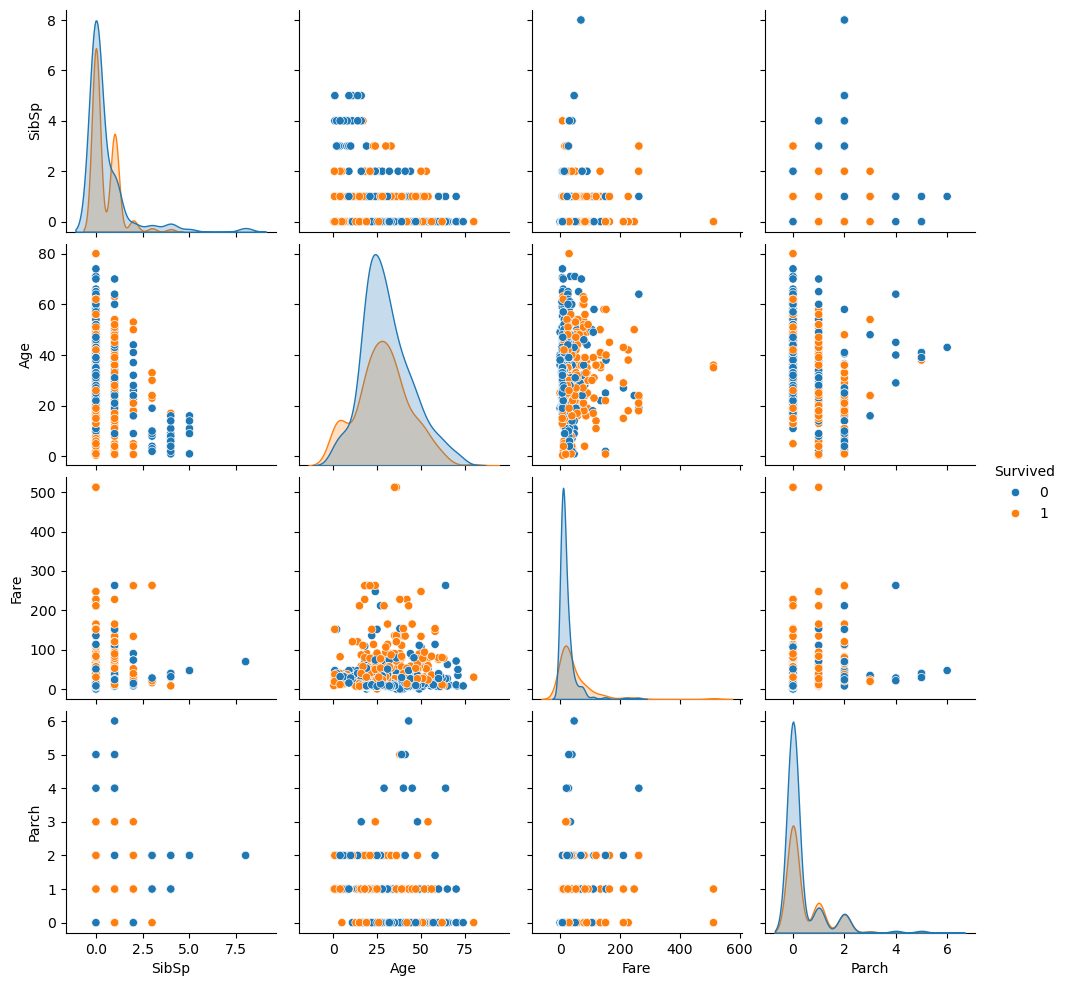

In [3309]:
sns.pairplot(traindf, hue="Survived", vars=["SibSp", "Age", "Fare","Parch"])
plt.show()


<Axes: xlabel='Family_Size', ylabel='count'>

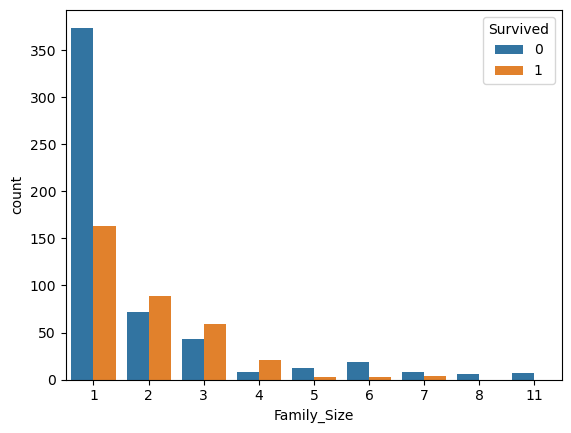

In [3310]:
sns.countplot(data=traindf, x='Family_Size', hue='Survived')

In [3311]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(traindf["Family_Size"], traindf["Survived"])
print(f"Correlation: {correlation}, p-value: {p_value}")


Correlation: 0.016638989282745306, p-value: 0.6198911221343025


<Axes: xlabel='Family_Size', ylabel='Survived'>

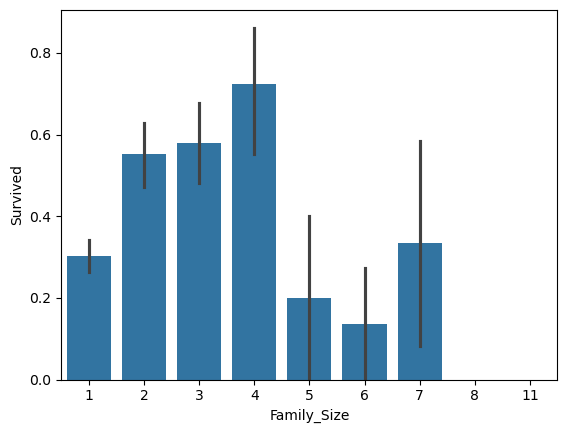

In [3312]:
sns.barplot(x="Family_Size", y="Survived", data=traindf)


In [3313]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Prepare data
X = traindf[["Family_Size",  "SibSp", "Parch"]]  # Add relevant features
y = traindf["Survived"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Coefficients for each feature
print(dict(zip(["Family_Size", "Pclass", "SibSp", "Parch"], model.coef_[0])))


{'Family_Size': -0.001467792697616398, 'Pclass': -0.17397351944637235, 'SibSp': 0.2350700773227195}


In [3314]:
traindf['is_alone'] = [1 if i<2 else 0 for i in traindf["Family_Size"]]

<Axes: xlabel='is_alone', ylabel='count'>

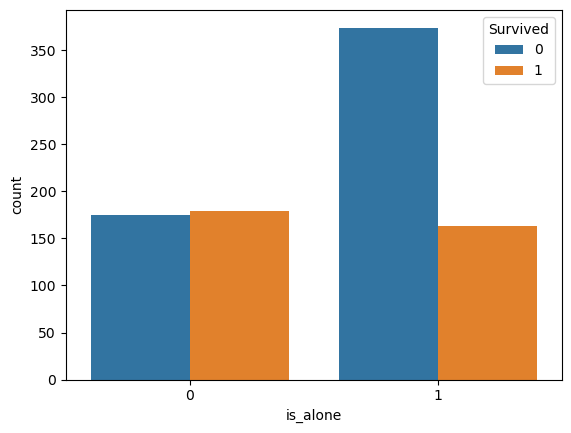

In [3315]:
sns.countplot(data=traindf, x='is_alone', hue='Survived')

In [3316]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname', 'has_cabin', 'Title',
       'Family_Size', 'is_alone'],
      dtype='object')

In [3317]:
traindf.drop("Parch",axis=1,inplace=True)
traindf.drop("SibSp",axis=1,inplace=True)
traindf.drop("Ticket",axis=1,inplace=True)
#traindf.drop("Family_Size",axis=1,inplace=True)

In [3318]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin',
       'Embarked', 'Surname', 'has_cabin', 'Title', 'Family_Size', 'is_alone'],
      dtype='object')

In [3319]:
##family size,sibsp and parch will be tested for when removed and included

<Axes: xlabel='Sex', ylabel='count'>

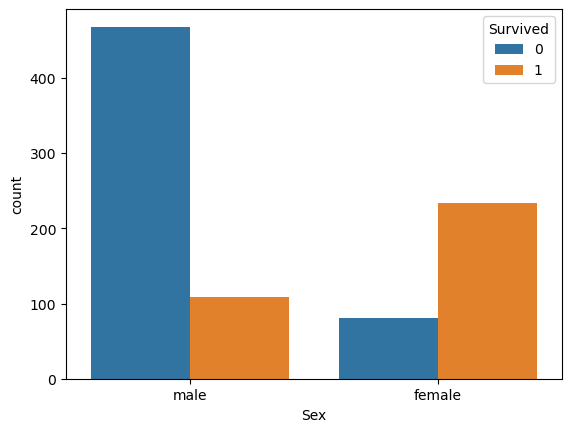

In [3320]:
sns.countplot(data=traindf, x='Sex', hue='Survived')

In [3321]:
##clearly there is a relationship between sex and survival

<Axes: xlabel='Pclass', ylabel='Fare'>

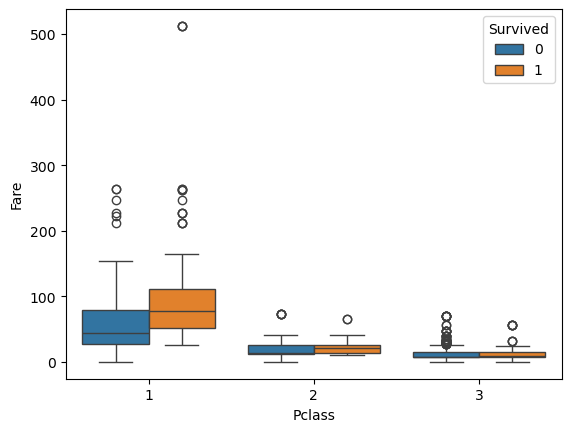

In [3322]:
sns.boxplot(x='Pclass', y='Fare', data=traindf,hue="Survived")

<Axes: xlabel='Fare', ylabel='Count'>

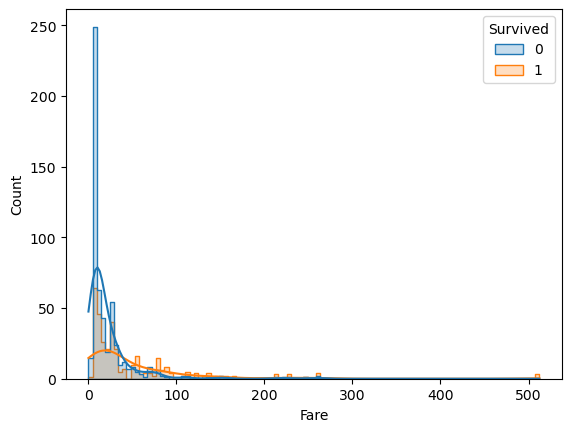

In [3323]:
sns.histplot(data=traindf, x='Fare', hue='Survived', element='step', kde=True)

<Axes: xlabel='Survived', ylabel='Fare'>

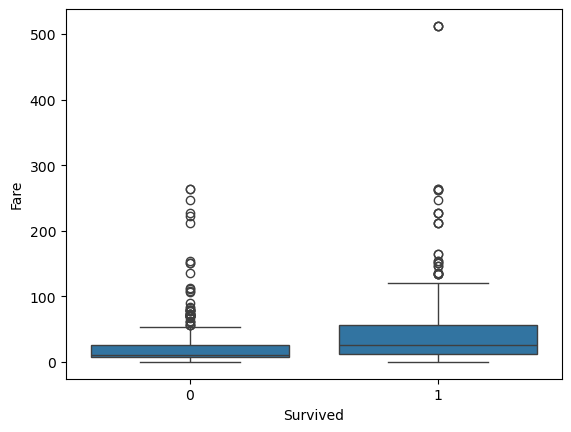

In [3324]:
sns.boxplot(x='Survived', y='Fare', data=traindf)

<Axes: xlabel='Pclass', ylabel='Fare'>

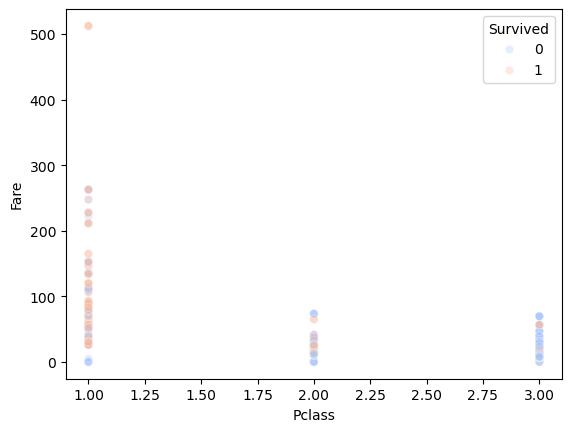

In [3325]:
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', data=traindf, palette='coolwarm', alpha=0.3)

In [3326]:
traindf["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [3327]:
31-7.9104

23.0896

In [3328]:
traindf[(traindf["Fare"] > 31+1.5*(23.0896)) | (traindf["Fare"] < 7.9104-1.5*23.0896)]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Surname,has_cabin,Title,Family_Size,is_alone
1,2,1,1,female,38.0,71.2833,C85,C,Cumings,1,Mrs,2,0
27,28,0,1,male,19.0,263.0000,C23 C25 C27,S,Fortune,1,Mr,6,0
31,32,1,1,female,NaN,146.5208,B78,C,Spencer,1,Mrs,2,0
34,35,0,1,male,28.0,82.1708,NaN,C,Meyer,0,Mr,2,0
52,53,1,1,female,49.0,76.7292,D33,C,Harper,1,Mrs,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,male,NaN,69.5500,NaN,S,Sage,0,Mr,11,0
849,850,1,1,female,NaN,89.1042,C92,C,Goldenberg,1,Mrs,2,0
856,857,1,1,female,45.0,164.8667,NaN,S,Wick,0,Mrs,3,0
863,864,0,3,female,NaN,69.5500,NaN,S,Sage,0,Miss,11,0


In [3331]:
traindf['calculated_fare'] = traindf.Fare/traindf.Family_Size 

<Axes: xlabel='calculated_fare', ylabel='Count'>

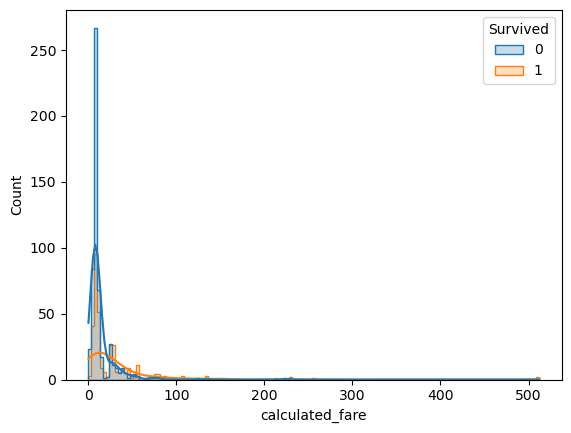

In [3332]:
sns.histplot(data=traindf, x='calculated_fare', hue='Survived', element='step', kde=True)

In [3333]:
traindf[(traindf["Fare"] > 31+1.5*(23.0896)) | (traindf["Fare"] < 7.9104-1.5*23.0896)]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Surname,has_cabin,Title,Family_Size,is_alone,Fare_Pclass,calculated_fare
1,2,1,1,female,38.0,71.2833,C85,C,Cumings,1,Mrs,2,0,71.283300,35.641650
27,28,0,1,male,19.0,263.0000,C23 C25 C27,S,Fortune,1,Mr,6,0,263.000000,43.833333
31,32,1,1,female,NaN,146.5208,B78,C,Spencer,1,Mrs,2,0,146.520800,73.260400
34,35,0,1,male,28.0,82.1708,NaN,C,Meyer,0,Mr,2,0,82.170800,41.085400
52,53,1,1,female,49.0,76.7292,D33,C,Harper,1,Mrs,2,0,76.729200,38.364600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,male,NaN,69.5500,NaN,S,Sage,0,Mr,11,0,23.183333,6.322727
849,850,1,1,female,NaN,89.1042,C92,C,Goldenberg,1,Mrs,2,0,89.104200,44.552100
856,857,1,1,female,45.0,164.8667,NaN,S,Wick,0,Mrs,3,0,164.866700,54.955567
863,864,0,3,female,NaN,69.5500,NaN,S,Sage,0,Miss,11,0,23.183333,6.322727


In [3334]:
traindf["calculated_fare"].describe()

count    891.000000
mean      19.916375
std       35.841257
min        0.000000
25%        7.250000
50%        8.300000
75%       23.666667
max      512.329200
Name: calculated_fare, dtype: float64

In [3335]:
traindf[(traindf["calculated_fare"] > 23.666667+1.5*(23.666667-7.250000)) | (traindf["calculated_fare"] < 7.250000-1.5*(23.666667-7.250000))]["calculated_fare"]

6      51.862500
31     73.260400
61     80.000000
72     73.500000
74     56.495800
         ...    
826    56.495800
829    80.000000
838    56.495800
856    54.955567
867    50.495800
Name: calculated_fare, Length: 69, dtype: float64

<Axes: xlabel='calculated_fare', ylabel='Count'>

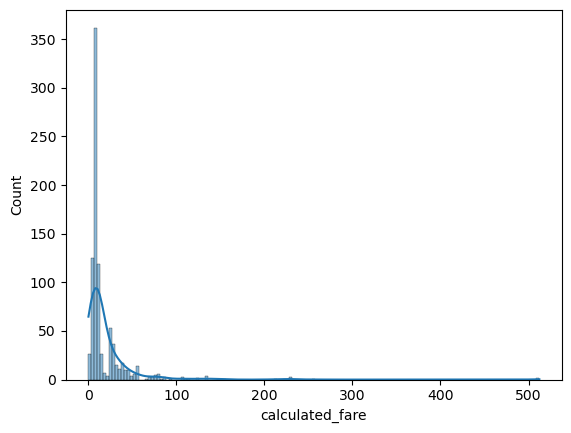

In [3336]:
sns.histplot(data=traindf,x="calculated_fare",kde=True)

In [3337]:
traindf["Fare_Pclass"].describe()

count    891.000000
mean      25.046650
std       51.245594
min        0.000000
25%        2.641667
50%        6.325000
75%       23.183333
max      512.329200
Name: Fare_Pclass, dtype: float64

In [3338]:
traindf[(traindf["Fare_Pclass"] > 23.183333+1.5*(23.183333-2.641667)) | (traindf["Fare_Pclass"] < 2.641667-1.5*(23.183333-2.641667))]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Surname,has_cabin,Title,Family_Size,is_alone,Fare_Pclass,calculated_fare
1,2,1,1,female,38.0,71.2833,C85,C,Cumings,1,Mrs,2,0,71.2833,35.641650
27,28,0,1,male,19.0,263.0000,C23 C25 C27,S,Fortune,1,Mr,6,0,263.0000,43.833333
31,32,1,1,female,NaN,146.5208,B78,C,Spencer,1,Mrs,2,0,146.5208,73.260400
34,35,0,1,male,28.0,82.1708,NaN,C,Meyer,0,Mr,2,0,82.1708,41.085400
52,53,1,1,female,49.0,76.7292,D33,C,Harper,1,Mrs,2,0,76.7292,38.364600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,830,1,1,female,62.0,80.0000,B28,NaN,Stone,1,Mrs,1,1,80.0000,80.000000
835,836,1,1,female,39.0,83.1583,E49,C,Compton,1,Miss,3,0,83.1583,27.719433
849,850,1,1,female,NaN,89.1042,C92,C,Goldenberg,1,Mrs,2,0,89.1042,44.552100
856,857,1,1,female,45.0,164.8667,NaN,S,Wick,0,Mrs,3,0,164.8667,54.955567


In [3339]:
traindf.drop("Fare_Pclass",axis=1,inplace=True)
traindf.drop("Fare",axis=1,inplace=True)


In [3340]:
traindf

,PassengerId,Survived,Pclass,Sex,Age,Cabin,Embarked,Surname,has_cabin,Title,Family_Size,is_alone,calculated_fare
0,1,0,3,male,22.0,NaN,S,Braund,0,Mr,2,0,3.62500
1,2,1,1,female,38.0,C85,C,Cumings,1,Mrs,2,0,35.64165
2,3,1,3,female,26.0,NaN,S,Heikkinen,0,Miss,1,1,7.92500
3,4,1,1,female,35.0,C123,S,Futrelle,1,Mrs,2,0,26.55000
4,5,0,3,male,35.0,NaN,S,Allen,0,Mr,1,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,NaN,S,Montvila,0,Other,1,1,13.00000
887,888,1,1,female,19.0,B42,S,Graham,1,Miss,1,1,30.00000
888,889,0,3,female,NaN,NaN,S,Johnston,0,Miss,4,0,5.86250
889,890,1,1,male,26.0,C148,C,Behr,1,Mr,1,1,30.00000


In [3341]:
#age cabin embarked are left 

<Axes: xlabel='Embarked', ylabel='count'>

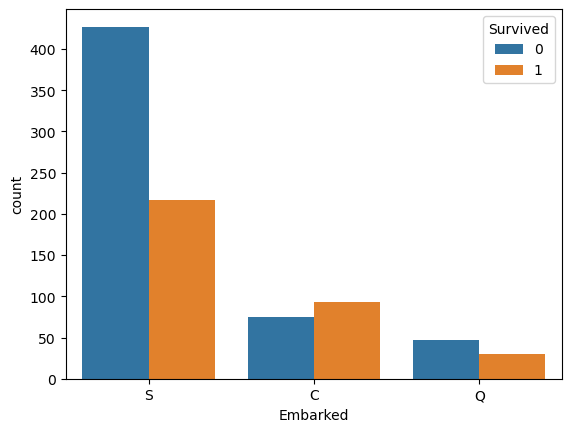

In [3342]:
sns.countplot(data=traindf,x="Embarked",hue="Survived")

<Axes: xlabel='Embarked', ylabel='Survived'>

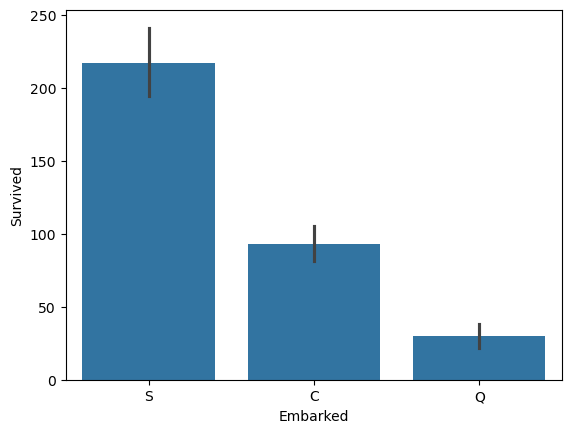

In [3343]:
sns.barplot(data=traindf, x='Embarked', y='Survived', estimator=sum)

In [3344]:
contingency_table = pd.crosstab(traindf['Embarked'], traindf['Survived'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 26.48914983923762, p-value: 1.769922284120912e-06


In [3345]:
traindf.drop("Cabin",axis=1,inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

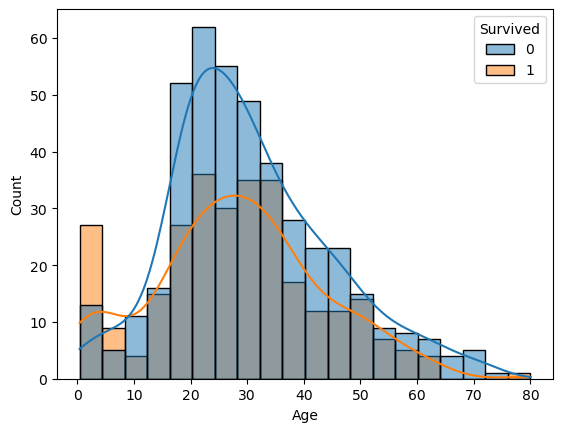

In [3346]:
sns.histplot(data=traindf,x="Age",kde=True,hue="Survived")

In [3347]:
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Embarked',
       'Surname', 'has_cabin', 'Title', 'Family_Size', 'is_alone',
       'calculated_fare'],
      dtype='object')

In [3348]:
traindf

,PassengerId,Survived,Pclass,Sex,Age,Embarked,Surname,has_cabin,Title,Family_Size,is_alone,calculated_fare
0,1,0,3,male,22.0,S,Braund,0,Mr,2,0,3.62500
1,2,1,1,female,38.0,C,Cumings,1,Mrs,2,0,35.64165
2,3,1,3,female,26.0,S,Heikkinen,0,Miss,1,1,7.92500
3,4,1,1,female,35.0,S,Futrelle,1,Mrs,2,0,26.55000
4,5,0,3,male,35.0,S,Allen,0,Mr,1,1,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,S,Montvila,0,Other,1,1,13.00000
887,888,1,1,female,19.0,S,Graham,1,Miss,1,1,30.00000
888,889,0,3,female,NaN,S,Johnston,0,Miss,4,0,5.86250
889,890,1,1,male,26.0,C,Behr,1,Mr,1,1,30.00000


In [3349]:
#split then missing values then outliers

In [3350]:
traindf.drop("Family_Size",axis=1,inplace=True)

In [3351]:
traindf['Male'] = traindf['Sex'].apply(lambda x: 1 if x == 'male' else 0)

traindf.drop("Sex",axis=1,inplace=True)

In [3354]:
from sklearn.model_selection import train_test_split

In [3355]:
traindf.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Age                177
Embarked             2
Surname              0
has_cabin            0
Title                0
is_alone             0
calculated_fare      0
Male                 0
dtype: int64

In [3357]:
traindf = pd.get_dummies(traindf, columns=['Title'])
traindf.drop("Title_Other",axis=1,inplace=True)
traindf.drop("PassengerId",axis=1,inplace=True)

In [3359]:
traindf.dropna(subset=['Embarked'], inplace=True)

In [3360]:
# Rows where 'Age' is not missing
known_age = traindf[traindf['Age'].notnull()]

# Rows where 'Age' is missing
missing_age = traindf[traindf['Age'].isnull()]


In [3361]:
features = ['Pclass', 'calculated_fare', 'Male',"is_alone","Title_Miss","Title_Mr","Title_Mrs","Title_Master"]
from sklearn.ensemble import RandomForestRegressor


age_model = RandomForestRegressor(random_state=42)


In [3362]:
age_model.fit(known_age[features], known_age['Age'])

RandomForestRegressor(random_state=42)

In [3363]:
traindf.loc[traindf['Age'].isnull(), 'Age'] = age_model.predict(missing_age[features])


In [3364]:
traindf.isna().sum()

Survived           0
Pclass             0
Age                0
Embarked           0
Surname            0
has_cabin          0
is_alone           0
calculated_fare    0
Male               0
Title_Master       0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
dtype: int64

In [3365]:
X = traindf.drop("Survived",axis=1)
y = traindf[["Survived"]]

In [3366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3367]:
def see_drop_outliers(feature,drop_flag=False):
    # Calculate Q1, Q3, and IQR for the 'Age' column
    Q1 = X_train[feature].quantile(0.25)
    Q3 = X_train[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where 'Age' is an outlier
    outliers_age = X_train[(X_train[feature] < lower_bound) | (X_train[feature] > upper_bound)]


    outlier_count = outliers_age.shape[0]
    print(outlier_count)

In [3368]:
# Calculate Q1, Q3, and IQR for the 'Age' column
Q1 = X_train['Age'].quantile(0.25)
Q3 = X_train['Age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'Age' is an outlier
outliers_age = X_train[(X_train['Age'] < lower_bound) | (X_train['Age'] > upper_bound)]


outlier_count = outliers_age.shape[0]
print(outlier_count)

8


In [3369]:
outliers_age

,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
630,1,80.0,S,Barkworth,1,1,30.0000,1,False,False,True,False
116,3,70.5,Q,Connors,0,1,7.7500,1,False,False,True,False
851,3,74.0,S,Svensson,0,1,7.7750,1,False,False,True,False
280,3,65.0,Q,Duane,0,1,7.7500,1,False,False,True,False
672,2,70.0,S,Mitchell,0,1,10.5000,1,False,False,True,False
96,1,71.0,C,Goldschmidt,1,1,34.6542,1,False,False,True,False
493,1,71.0,C,Artagaveytia,0,1,49.5042,1,False,False,True,False
456,1,65.0,S,Millet,1,1,26.5500,1,False,False,True,False


In [3370]:
X_train = X_train.drop(outliers_age.index)

In [3371]:
y_train= y_train.drop(outliers_age.index)

In [3372]:
X_train[(X_train["calculated_fare"]==7.75)&(X_train["Age"]==70.5)]

,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs


In [3373]:
outliers_age.index

Index([630, 116, 851, 280, 672, 96, 493, 456], dtype='int64')

In [3374]:
print(X_train.shape)
print(y_train.shape)

(703, 12)
(703, 1)


In [3375]:


# Apply log1p transformation to reduce skewness in the `calculated_fare` feature
X_train['calculated_fare'] = np.log1p(X_train['calculated_fare'])

# If you have X_test, apply the same transformation
X_test['calculated_fare'] = np.log1p(X_test['calculated_fare'])

In [3376]:


# Apply log1p transformation to reduce skewness in the `calculated_fare` feature
traindf['calculated_fare'] = np.log1p(traindf['calculated_fare'])


<Axes: xlabel='calculated_fare', ylabel='Count'>

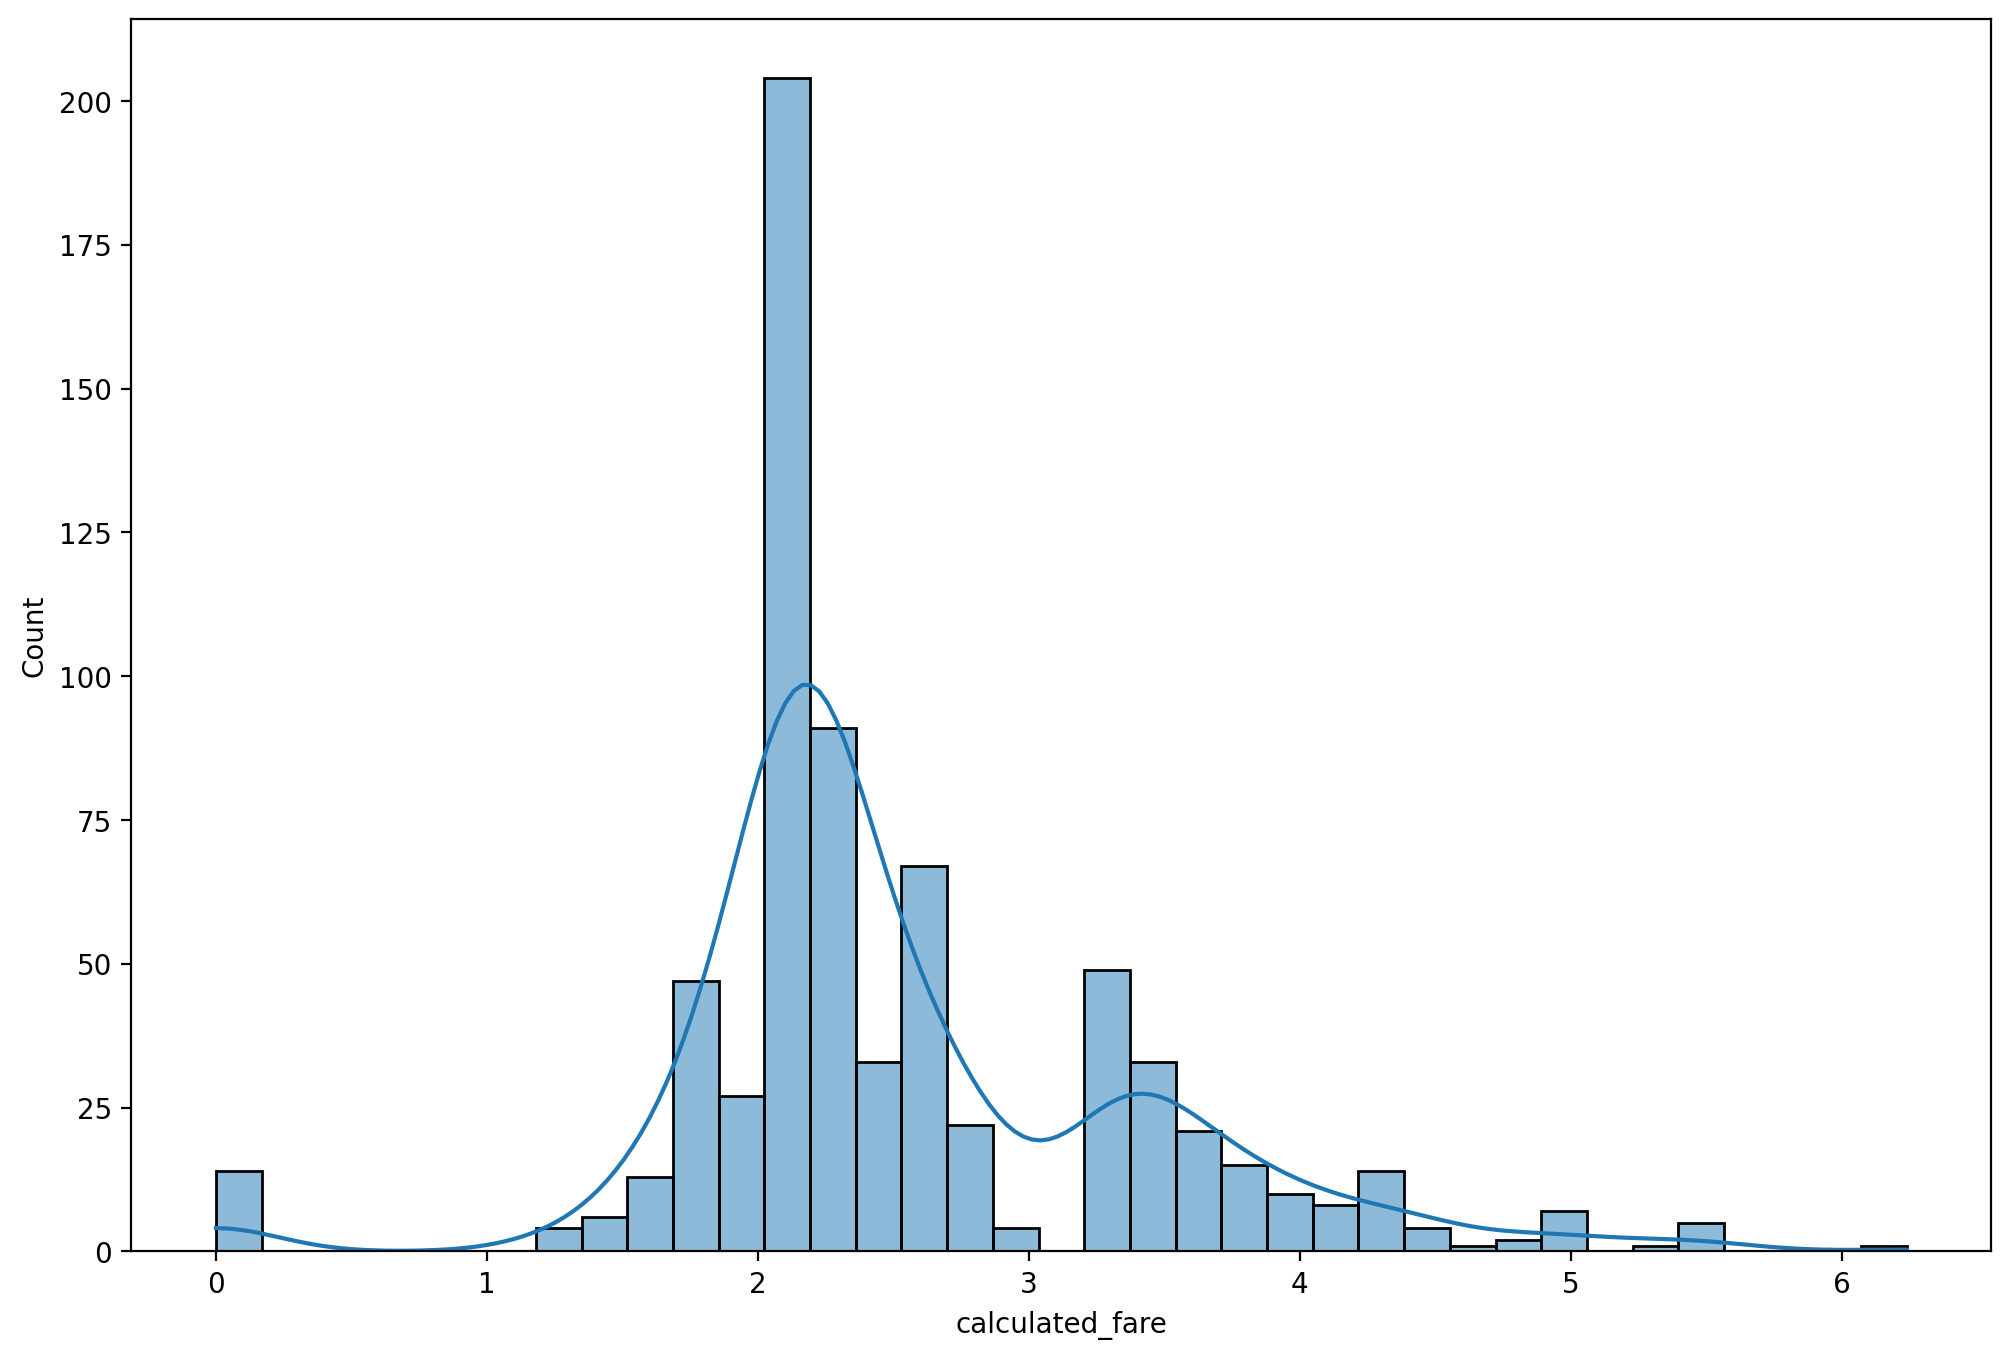

In [3377]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=X_train,x="calculated_fare",kde=True)

In [3378]:
see_drop_outliers("calculated_fare")

60


In [3379]:
X_train

,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
708,1,22.000000,S,Cleaver,0,1,5.027492,0,False,True,False,False
240,3,14.596083,C,Zabour,0,0,2.107434,0,False,True,False,False
382,3,32.000000,S,Tikkanen,0,1,2.188856,1,False,False,True,False
792,3,5.370000,S,Sage,0,0,1.990983,0,False,True,False,False
683,3,14.000000,S,Goodwin,0,0,1.926072,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,30.561059,S,Moss,0,1,2.171907,1,False,False,True,False
271,3,25.000000,S,Tornquist,0,1,0.000000,1,False,False,True,False
862,1,48.000000,S,Swift,1,1,3.293211,0,False,False,False,True
436,3,21.000000,S,Ford,0,0,2.063693,0,False,True,False,False


In [3380]:
X_train[X_train["calculated_fare"]==0]

,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
413,2,33.235545,S,Cunningham,0,1,0.0,1,False,False,True,False
732,2,33.235545,S,Knight,0,1,0.0,1,False,False,True,False
815,1,38.977472,S,Fry,1,1,0.0,1,False,False,True,False
597,3,49.000000,S,Johnson,0,1,0.0,1,False,False,True,False
179,3,36.000000,S,Leonard,0,1,0.0,1,False,False,True,False
822,1,38.000000,S,Reuchlin,0,1,0.0,1,False,False,False,False
302,3,19.000000,S,Johnson,0,1,0.0,1,False,False,True,False
481,2,33.235545,S,Frost,0,1,0.0,1,False,False,True,False
674,2,33.235545,S,Watson,0,1,0.0,1,False,False,True,False
263,1,40.000000,S,Harrison,1,1,0.0,1,False,False,True,False


In [3381]:
traindf["calculated_fare"].describe()

count    889.000000
mean       2.560896
std        0.854235
min        0.000000
25%        2.110213
50%        2.214661
75%        3.158064
max        6.240917
Name: calculated_fare, dtype: float64

In [3382]:
traindf[traindf["calculated_fare"]<1]

,Survived,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs
68,1,3,17.000000,S,Andersson,0,0,0.757128,0,False,True,False,False
179,0,3,36.000000,S,Leonard,0,1,0.000000,1,False,False,True,False
263,0,1,40.000000,S,Harrison,1,1,0.000000,1,False,False,True,False
271,1,3,25.000000,S,Tornquist,0,1,0.000000,1,False,False,True,False
277,0,2,33.235545,S,Parkes,0,1,0.000000,1,False,False,True,False
302,0,3,19.000000,S,Johnson,0,1,0.000000,1,False,False,True,False
413,0,2,33.235545,S,Cunningham,0,1,0.000000,1,False,False,True,False
466,0,2,33.235545,S,Campbell,0,1,0.000000,1,False,False,True,False
481,0,2,33.235545,S,Frost,0,1,0.000000,1,False,False,True,False
597,0,3,49.000000,S,Johnson,0,1,0.000000,1,False,False,True,False


In [3383]:
traindf['embarked_zero'] =  (traindf['calculated_fare'] == 0).astype(int)
X_train['embarked_zero'] = ((X_train['calculated_fare'] == 0)).astype(int)
X_test['embarked_zero'] = ( (X_test['calculated_fare'] == 0)).astype(int)

In [3384]:
traindf[(traindf["calculated_fare"]>4.5)]

,Survived,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,embarked_zero
118,0,1,24.00,C,Baxter,1,0,4.826395,1,False,False,True,False,0
195,1,1,58.00,C,Lurette,1,1,4.993969,0,False,True,False,False,0
258,1,1,35.00,C,Ward,0,1,6.240917,0,False,True,False,False,0
269,1,1,35.00,S,Bissette,1,1,4.917301,0,False,True,False,False,0
299,1,1,50.00,C,Baxter,1,0,4.826395,0,False,False,False,True,0
306,1,1,28.23,C,Fleming,0,1,4.717456,0,False,True,False,False,0
325,1,1,36.00,C,Young,1,1,4.917301,0,False,True,False,False,0
337,1,1,41.00,C,Burns,1,1,4.908972,0,False,True,False,False,0
373,0,1,22.00,C,Ringhini,0,1,4.917301,1,False,False,True,False,0
380,1,1,42.00,C,Bidois,0,1,5.431646,0,False,True,False,False,0


In [3385]:
survival_rate = traindf[traindf['embarked_zero'] == 1]['Survived'].mean()
print(f"Survival rate with calculated fare 0: {survival_rate}")


Survival rate with calculated fare 0: 0.06666666666666667


In [3386]:
traindf['high_calculated_fare'] = (traindf['calculated_fare'] > 4.5).astype(int)
survival_rate = traindf[traindf['high_calculated_fare'] == 1]['Survived'].mean()

In [3387]:
X_train['high_calculated_fare'] = (X_train['calculated_fare'] > 4.5).astype(int)
X_test['high_calculated_fare'] = (X_test['calculated_fare'] > 4.5).astype(int)

In [3388]:
print(f"Survival rate  with calculated fare 0: {survival_rate}")

Survival rate  with calculated fare 0: 0.8260869565217391


In [3389]:
see_drop_outliers("calculated_fare")

60


<Axes: xlabel='calculated_fare', ylabel='Count'>

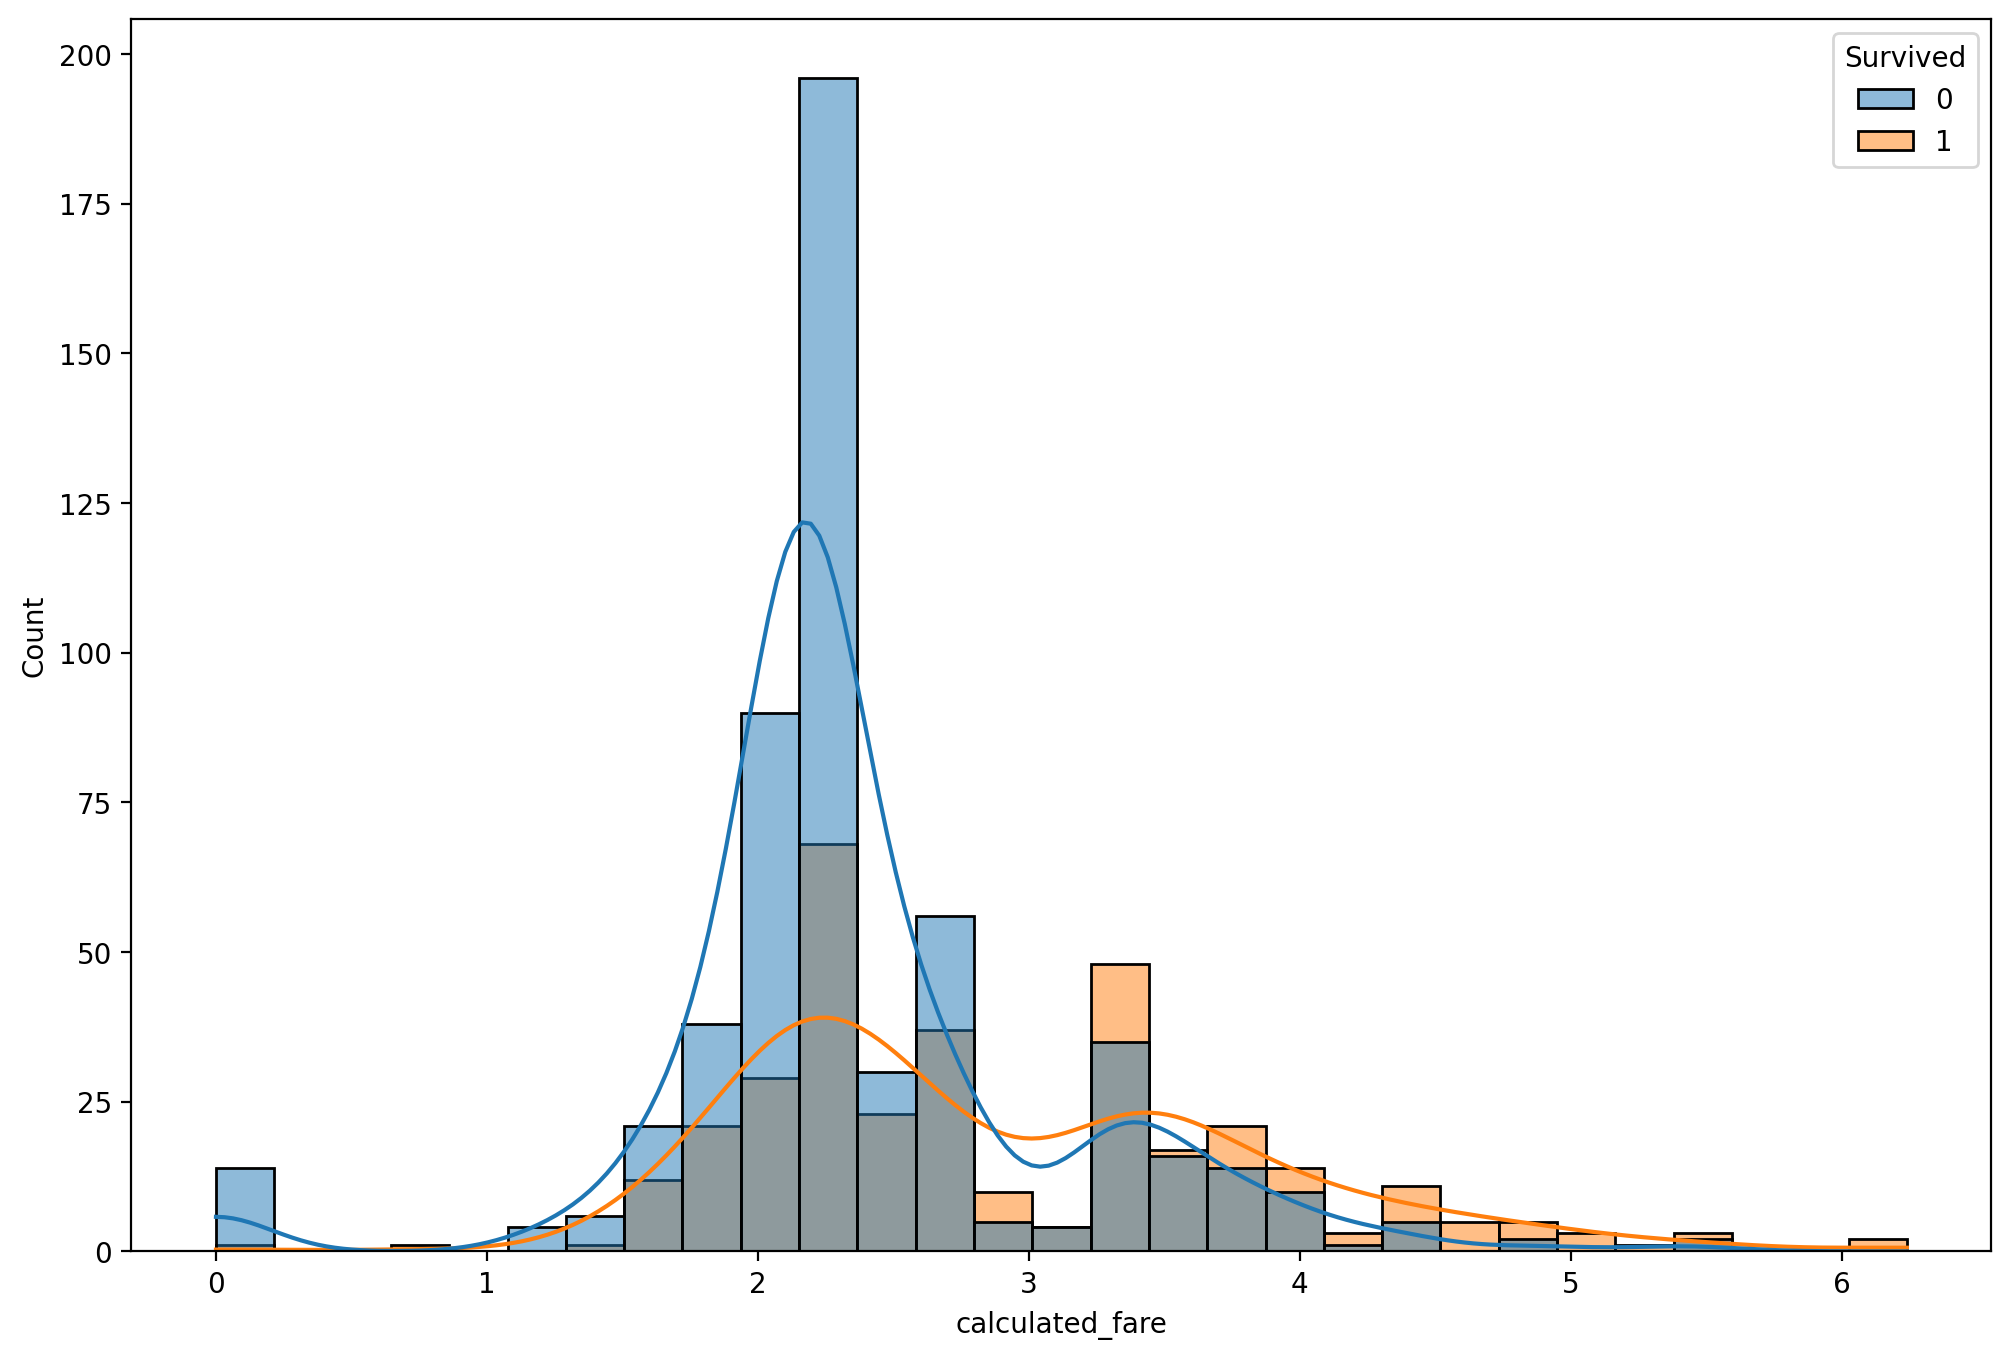

In [3390]:
plt.figure(figsize=(12,8),dpi=200)
sns.histplot(data=traindf,x="calculated_fare",kde=True,hue="Survived")

In [3391]:
X_train.columns

Index(['Pclass', 'Age', 'Embarked', 'Surname', 'has_cabin', 'is_alone',
       'calculated_fare', 'Male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'embarked_zero', 'high_calculated_fare'],
      dtype='object')

In [3392]:
X_train

,Pclass,Age,Embarked,Surname,has_cabin,is_alone,calculated_fare,Male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,embarked_zero,high_calculated_fare
708,1,22.000000,S,Cleaver,0,1,5.027492,0,False,True,False,False,0,1
240,3,14.596083,C,Zabour,0,0,2.107434,0,False,True,False,False,0,0
382,3,32.000000,S,Tikkanen,0,1,2.188856,1,False,False,True,False,0,0
792,3,5.370000,S,Sage,0,0,1.990983,0,False,True,False,False,0,0
683,3,14.000000,S,Goodwin,0,0,1.926072,1,False,False,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,30.561059,S,Moss,0,1,2.171907,1,False,False,True,False,0,0
271,3,25.000000,S,Tornquist,0,1,0.000000,1,False,False,True,False,1,0
862,1,48.000000,S,Swift,1,1,3.293211,0,False,False,False,True,0,0
436,3,21.000000,S,Ford,0,0,2.063693,0,False,True,False,False,0,0


In [3393]:
traindf['Embarked'] = traindf['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_train['Embarked'] = X_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
X_test['Embarked'] = X_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [3394]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numeric_columns = ['Age', 'calculated_fare']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
#X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
#X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])


In [3395]:
from sklearn.metrics import accuracy_score, classification_report

def see_accuracy(model):
    # Use the model to predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    
    
    
    return accuracy  # Return the accuracy for further use


In [3396]:
traindf.drop("Surname",axis=1,inplace=True)

In [3397]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              889 non-null    int64  
 1   Pclass                889 non-null    int64  
 2   Age                   889 non-null    float64
 3   Embarked              889 non-null    int64  
 4   has_cabin             889 non-null    int64  
 5   is_alone              889 non-null    int64  
 6   calculated_fare       889 non-null    float64
 7   Male                  889 non-null    int64  
 8   Title_Master          889 non-null    bool   
 9   Title_Miss            889 non-null    bool   
 10  Title_Mr              889 non-null    bool   
 11  Title_Mrs             889 non-null    bool   
 12  embarked_zero         889 non-null    int64  
 13  high_calculated_fare  889 non-null    int64  
dtypes: bool(4), float64(2), int64(8)
memory usage: 79.9 KB


In [3398]:
X_train.drop("Surname",axis=1,inplace=True)
X_test.drop("Surname",axis=1,inplace=True)

In [3437]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

l1_ratio = np.linspace(0, 1, 20)

# Define parameter grid with compatible combinations
param_grid_lr = [
    {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear']},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg']},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': l1_ratio},
]

# Set up Grid Search
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 200],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [98, 99, 100, 101, 102], 'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [3400]:
see_accuracy(grid_search_lr)

0.8089887640449438

In [3401]:
from sklearn.svm import SVC

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [3402]:
see_accuracy(grid_search_svm)


0.7752808988764045

In [3445]:
grid_search_rf.best_params_

{'max_depth': 17,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [3442]:
grid_search_rf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [3444]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 15, 17, 20],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [3446]:
see_accuracy(grid_search_rf)


0.7808988764044944

In [3405]:
from xgboost import XGBClassifier

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [3406]:
see_accuracy(grid_search_xgb)


0.7752808988764045

In [3407]:
from sklearn.ensemble import AdaBoostClassifier

# Define parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent t

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [3408]:
see_accuracy(grid_search_ada)

0.7921348314606742

In [3409]:
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [3410]:
see_accuracy(grid_search_gb)

0.797752808988764

In [3411]:
from catboost import CatBoostClassifier

# Define parameter grid
param_grid_cb = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

grid_search_cb = GridSearchCV(CatBoostClassifier(verbose=0), param_grid_cb, cv=5, scoring='accuracy')
grid_search_cb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x353783770>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy')

In [3412]:
see_accuracy(grid_search_cb)

0.7752808988764045

In [3421]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search_knn
grid_search_lr
grid_search_rf

In [3420]:
see_accuracy(grid_search_knn)

0.797752808988764

In [3447]:
model_names = [
    "KNeighborsClassifier",
    "LogisticRegression",
    "SVC",
    "RandomForestClassifier",
    "XGBClassifier",
    "CatBoostClassifier",
    "AdaBoostClassifier",
    "GradientBoostingClassifier"
]

models = [grid_search_knn, grid_search_lr, grid_search_svm, grid_search_rf, grid_search_xgb, grid_search_cb, grid_search_ada, grid_search_gb]

for name, model in zip(model_names, models):
    accuracy = see_accuracy(model)  # Now this returns the accuracy
    print(f"Accuracy of {name}: {accuracy:.4f}")


Accuracy of KNeighborsClassifier: 0.8034
Accuracy of LogisticRegression: 0.8090
Accuracy of SVC: 0.7753
Accuracy of RandomForestClassifier: 0.7809
Accuracy of XGBClassifier: 0.7753
Accuracy of CatBoostClassifier: 0.7753
Accuracy of AdaBoostClassifier: 0.7921
Accuracy of GradientBoostingClassifier: 0.7978


In [3477]:
testdf = pd.read_csv("test.csv")

In [3450]:
testdf.shape

(418, 11)

In [3486]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           418 non-null    int64  
 1   Pclass                418 non-null    int64  
 2   Age                   332 non-null    float64
 3   Embarked              418 non-null    object 
 4   Title_Master          418 non-null    bool   
 5   Title_Miss            418 non-null    bool   
 6   Title_Mr              418 non-null    bool   
 7   Title_Mrs             418 non-null    bool   
 8   calculated_fare       417 non-null    float64
 9   is_alone              418 non-null    int64  
 10  embarked_zero         418 non-null    int64  
 11  high_calculated_fare  418 non-null    int64  
 12  Male                  418 non-null    int64  
 13  has_cabin             418 non-null    int64  
dtypes: bool(4), float64(2), int64(7), object(1)
memory usage: 34.4+ KB


In [3453]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Survived              889 non-null    int64  
 1   Pclass                889 non-null    int64  
 2   Age                   889 non-null    float64
 3   Embarked              889 non-null    int64  
 4   has_cabin             889 non-null    int64  
 5   is_alone              889 non-null    int64  
 6   calculated_fare       889 non-null    float64
 7   Male                  889 non-null    int64  
 8   Title_Master          889 non-null    bool   
 9   Title_Miss            889 non-null    bool   
 10  Title_Mr              889 non-null    bool   
 11  Title_Mrs             889 non-null    bool   
 12  embarked_zero         889 non-null    int64  
 13  high_calculated_fare  889 non-null    int64  
dtypes: bool(4), float64(2), int64(8)
memory usage: 79.9 KB


In [3478]:
testdf['Title'] = testdf['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
common_titles = ['Mr', 'Mrs', 'Master', 'Miss']
testdf['Title'] = testdf['Title'].apply(lambda title: title if title in common_titles else 'Other')
testdf = pd.get_dummies(testdf, columns=['Title'])
testdf.drop("Title_Other",axis=1,inplace=True)

In [3479]:
testdf['Family_Size'] = testdf['Parch'] + testdf['SibSp'] + 1
testdf['calculated_fare'] = testdf.Fare/testdf.Family_Size 
testdf['is_alone'] = [1 if i<2 else 0 for i in testdf["Family_Size"]]

In [3480]:
testdf.drop("Family_Size",axis=1,inplace=True)
testdf.drop("SibSp",axis=1,inplace=True)
testdf.drop("Parch",axis=1,inplace=True)

In [3481]:
testdf['calculated_fare'] = np.log1p(testdf['calculated_fare'])

testdf['embarked_zero'] =  (testdf['calculated_fare'] == 0).astype(int)
testdf['high_calculated_fare'] = (testdf['calculated_fare'] > 4.5).astype(int)

In [3482]:
testdf['Male'] = testdf['Sex'].apply(lambda x: 1 if x == 'male' else 0)
testdf.drop("Sex",axis=1,inplace=True)
testdf.drop("Name",axis=1,inplace=True)
testdf.drop("Ticket",axis=1,inplace=True)
testdf.drop("Fare",axis=1,inplace=True)

In [3483]:
testdf['has_cabin'] = testdf['Cabin'].notna().astype(int)
testdf.drop("Cabin",axis=1,inplace=True)

In [3487]:
features = ['Pclass', 'calculated_fare', 'Male',"is_alone","Title_Miss","Title_Mr","Title_Mrs","Title_Master"]
from sklearn.ensemble import RandomForestRegressor

# Rows where 'Age' is not missing
known_age = testdf[testdf['Age'].notnull()]

# Rows where 'Age' is missing
missing_age = testdf[testdf['Age'].isnull()]


age_model = RandomForestRegressor(random_state=42)
age_model.fit(known_age[features], known_age['Age'])
testdf.loc[testdf['Age'].isnull(), 'Age'] = age_model.predict(missing_age[features])


In [3488]:
mode_value = testdf['calculated_fare'].mode()[0]  # Get the mode
testdf['calculated_fare'].fillna(mode_value, inplace=True)

/var/folders/jb/t70v0shj6cv_h7yd_f6lg0400000gn/T/ipykernel_1064/3136548360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdf['calculated_fare'].fillna(mode_value, inplace=True)


In [3489]:
testdf.isna().sum()

PassengerId             0
Pclass                  0
Age                     0
Embarked                0
Title_Master            0
Title_Miss              0
Title_Mr                0
Title_Mrs               0
calculated_fare         0
is_alone                0
embarked_zero           0
high_calculated_fare    0
Male                    0
has_cabin               0
dtype: int64

In [3491]:
passenger_ids = testdf['PassengerId']

In [3493]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)